In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
# %matplotlib qt

# Needed to load the .ims LEICA microscope file
import h5py

In [2]:
def load_ims(fname):
    '''
    This function loads the .ims imaris image of the leica confocal microscope.
    '''
    # load .ims file into an h5py group
    f = h5py.File(fname, 'r')
    
    # Unpacking data into 3d images (one per channel)
    im_cancer = np.array(f['DataSet/ResolutionLevel 0/TimePoint 0/Channel 0'].get('Data'))
    im_cyto = np.array(f['DataSet/ResolutionLevel 0/TimePoint 0/Channel 1'].get('Data'))
    im_bf = np.array(f['DataSet/ResolutionLevel 0/TimePoint 0/Channel 2'].get('Data'))
    im_nuclei = np.array(f['DataSet/ResolutionLevel 0/TimePoint 0/Channel 3'].get('Data'))
    
    # Repacks data into a 4d image
    im4d = np.array([im_cancer, im_cyto, im_nuclei, im_bf])
    
    return im4d

# loading the leica data
im4d = load_ims('data/leica_prostate_cell_scan.ims')

In [3]:
np.shape(im4d)

(4, 16, 1024, 1024)

# Microscopie non-confocale

La sommation sur l'axe fait en sorte que l'on voit tous les plans de l'image "en même temps". Cela inclue les plans hors focus. C'est exactement comme en microscopie non-confocale.

In [4]:
imr_proj = im4d[0, :,:,:].sum(axis=0)
img_proj = im4d[1, :,:,:].sum(axis=0)
imb_proj = im4d[2, :,:,:].sum(axis=0)
imy_proj = im4d[3, :,:,:].sum(axis=0)

# Stack the 3 channels (R, G, B) for the projection image
im_proj = np.stack([imr_proj, img_proj, imb_proj], axis=2)

# Microscopie confocale

Seulement une tranche est visualisée (à l'indice 8 soit au centre), ce qui améliore grandement la résolution et donc la clarté de l'image.

In [5]:
# Choose a specific z-slice
zslice = 8
imr_slice = im4d[0, zslice,:,:]
img_slice = im4d[1, zslice,:,:]
imb_slice = im4d[2, zslice,:,:]
imy_slice = im4d[3, zslice,:,:]

# Stack the 3 channels (R, G, B) for the z-slice image
im_slice = np.stack([imr_slice, img_slice, imb_slice], axis=2)

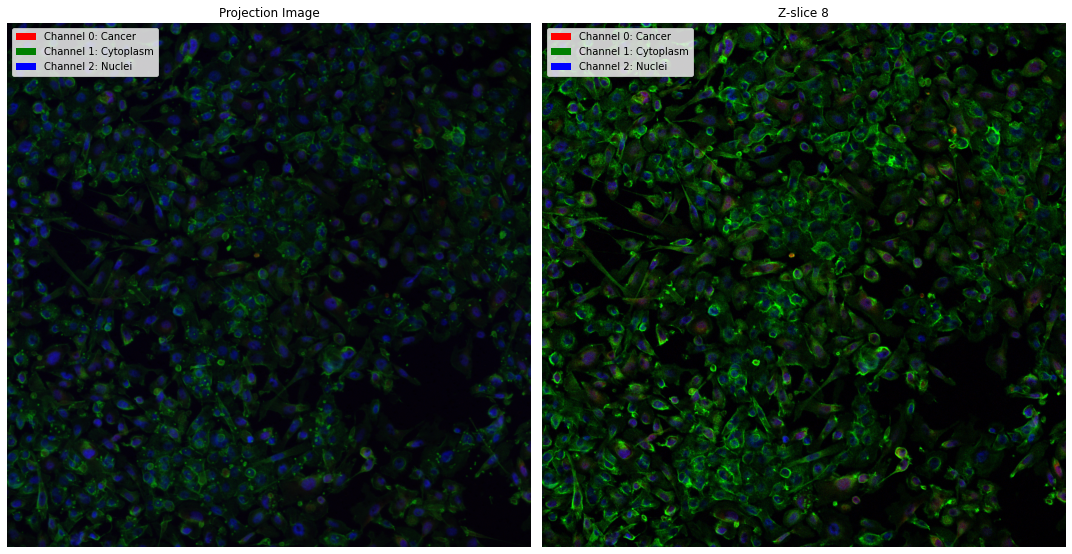

In [11]:
# Normalize both images
im_proj_normalized = im_proj / im_proj.max()
im_slice_normalized = im_slice / im_slice.max()

# Create proxy artists for the legend (one per channel)
legend_elements = [Patch(facecolor='red', label='Channel 0: Cancer'),
                   Patch(facecolor='green', label='Channel 1: Cytoplasm'),
                   Patch(facecolor='blue', label='Channel 2: Bright Field')]

# Create a figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,10])

# Display the projection image on the left
ax1.imshow(im_proj_normalized)
ax1.axis('off')
ax1.set_title('Projection Image')

# Add the legend for the projection image (upper left)
ax1.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, 1))

# Display the z-slice image on the right
ax2.imshow(im_slice_normalized)
ax2.axis('off')
ax2.set_title(f'Z-slice {zslice}')

# Add the legend for the z-slice image (upper left)
ax2.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, 1))

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

Now let's see how to look at a single nuclei. For instance, let's look at the nuclei at (x=325, y=190).

In [ ]:
imr = 2*im4d[0, :, 175:205, 310:340].sum(axis=0)
img = im4d[1, :, 175:205, 310:340].sum(axis=0)
imb = im4d[2, :, 175:205, 310:340].sum(axis=0)
im = np.stack([imr,img,imb], axis=2)


plt.figure(figsize=[10,10])
plt.imshow(im/im.max())
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
zlayer = 5
imr = 2*im4d[0, zlayer, 175:205, 310:340]
img = im4d[1, zlayer, 175:205, 310:340]
imb = im4d[2, zlayer, 175:205, 310:340]
im = np.stack([imr,img,imb], axis=2)


plt.figure(figsize=[10,10])
plt.imshow(im/im.max())
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
x = range(310, 340)
ylayer = 190
imr = 2*im4d[0, :, ylayer, x].T
img = im4d[1, :, ylayer, x].T
imb = im4d[2, :, ylayer, x].T
im = np.stack([imr,img,imb], axis=2)


plt.figure(figsize=[10,10])
plt.imshow(im/im.max())
plt.xlabel('x')
plt.ylabel('z')

In [ ]:
x = range(310, 340)
xlayer = 325
y = range(175, 205)
imr = 2*im4d[0, :, y, xlayer].T
img = im4d[1, :, y, xlayer].T
imb = im4d[2, :, y, xlayer].T
im = np.stack([imr,img,imb], axis=2)


plt.figure(figsize=[10,10])
plt.imshow(im/im.max())
plt.xlabel('y')
plt.ylabel('z')